# Assignment 1

## Introduction

## Data cleaning
### Read in and merge the two data sets (tip: think of different CSV formats that exist)

In [49]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

In [50]:
df1 = pd.read_csv("survey.csv")
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [51]:
df2 = pd.read_csv("steps.csv", sep = ";")
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
og_df = pd.merge(df1, df2, on = "id") #'id' is the common identifier
og_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean the data: remove impossible values

In [53]:
og_df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


From the description of the data, it is already noticeable that the minimum and maximum weight are impossible weight values. In the next step the heigth and weight are going to be plotted to show more potential outliers.

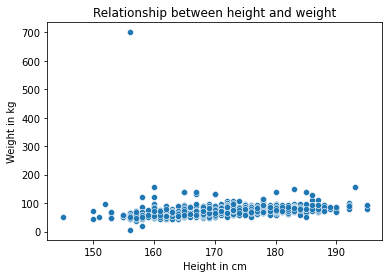

In [54]:
sns.scatterplot(x="height", y="weight", data=og_df)
plt.title("Relationship between height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

The data visualisation shows data points with weights over 700kg or 0kg, which cannot be physically possible. Therefore these data points have been marked as an outlier due to improper data-entry and will be removed in a new dataframe in the next step.

In [55]:
df = og_df
df = df.fillna(0)
df = df[(df["weight"] < 200) & (df["weight"] > 35)]
df = df[(df["height"] < 250) & (df["height"] > 50)]
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure.

In [72]:
for i in df["id"]:
    df["mean_steps"] = df.iloc[:, 9:337].mean(axis=1)

# Calculating the mean steps for all participants
steps_mean = df["mean_steps"].mean()
print("The mean of steps for all participants is",steps_mean)

The mean of steps for all participants is 2349.0547822582757


### Show the head() of the resulting data frame

In [57]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927


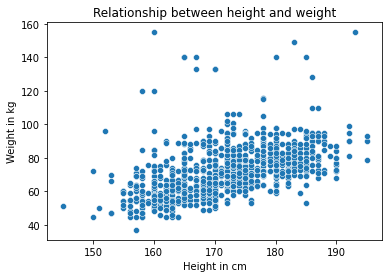

In [58]:
sns.scatterplot(x="height", y="weight", data=df)
plt.title("Relationship between height and weight")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

## Feature engineering
- The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

The BMI can be used as an indication of a healthy weight.
The BMI is calculated by dividing the weight in kg by the height in squaremeters.

In [59]:
df["height_sqm"] = df["height"].div(100).round(2) * df["height"].div(100).round(2)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_sqm
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,3.1684
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,3.2400
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,3.2400
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585,3.1684
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,2.7889


In [60]:
for i in df["id"]:
    df["bmi"] = df["weight"] / df["height_sqm"]

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_sqm,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000,3.1684,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951,3.2400,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,3.2400,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585,3.1684,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927,2.7889,21.872423


## Exploratory data analysis

- An analysis of mean steps per participant:
- Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
- Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

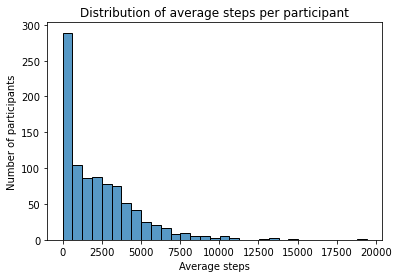

In [73]:
sns.histplot(x="mean_steps", data=df)
plt.xlabel("Average steps")
plt.ylabel("Number of participants")
plt.title("Distribution of average steps per participant")
plt.show()

The histogram shows the mean steps of the participants on the x-axis and the count of people with the amount of steps on the y-axis.
The histogram ranges from 0 steps on average to 13000 steps on average for some participants.
For further analysis, the median will be calculated as well.

In [76]:
steps_median = df["mean_steps"].median()
print("The median of the average steps per participants is", steps_median)

The median of the average steps per participants is 1681.9847560975609


While the mean of the steps per participant is 2349, the median is only 1681 steps and therefore the histogram is skewed to the right.

- The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
- Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
- Describe and interpret the results


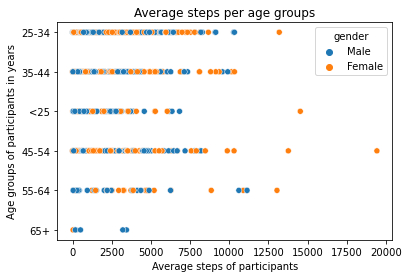

In [93]:
sns.scatterplot(data=df, x="mean_steps", y="age", hue="gender")
plt.title("Average steps per age groups")
plt.xlabel("Average steps of participants")
plt.ylabel("Age groups of participants in years")
plt.show()

The scatterplot shows the average steps per age groups. Blue and orange represent the genders male and female.
In 5 (out of 6) age groups from 25 years to 64 years female participants have the highest number of average steps.

In [91]:
df.groupby("age").count()
# df["gender"].value_counts

,id,city,gender,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,...,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_sqm,bmi
age,,,,,,,,,,,,,,,,,,,,,
25-34,424,424,424,424,424,424,424,424,424,424,...,424,424,424,424,424,424,424,424,424,424
35-44,175,175,175,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175
45-54,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
55-64,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
65+,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
<25,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124


- See last week for the first part (distribution of steps). In addition:
- Make a scatterplot matrix of the numerical variables
- Make a correlation matrix of the numerical variables
- Describe and interpret the results

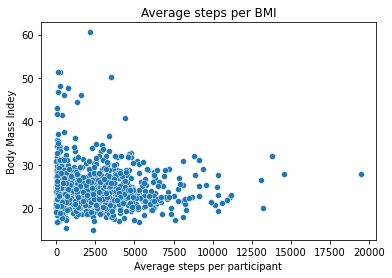

In [99]:
sns.scatterplot(data=df, x="mean_steps", y="bmi")
plt.title("Average steps per BMI")
plt.xlabel("Average steps per participant")
plt.ylabel("Body Mass Indey")
plt.show()

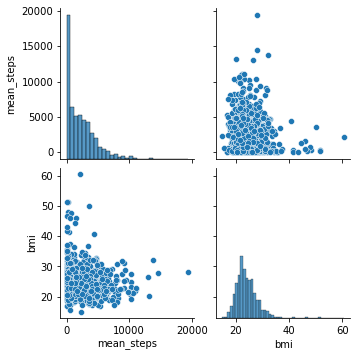

In [101]:
new_df = df[["mean_steps", "bmi"]] #making a new dataframe with a subset
sns.pairplot(new_df)
plt.show()

## Predictive model
- Explain linear regression in your own words
- Create dummy variables for the categorical variables
- Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

Linear regression tries to describe a relationship between one or more variables. It has one independent variable, in this case the BMI, and a dependent variable, the average steps.

In [114]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

x = df[["bmi"]]
y = df["mean_steps"]

lm = LinearRegression() #this creates a new LM model
lm.fit(x,y) # fits the model with the data

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0: .2f} + {b1: .2f}X") #.0f formats to 2 decimals.

The regression line is equal to y =  3034.54 + -28.05X


In [115]:
lm.predict(x)

array([2167.01167499, 2367.97457257, 2316.03413941, 2326.35424862,
       2421.06938242, 2423.12009589, 2347.65773647, 2127.94681328,
       2380.3721088 , 2076.4356399 , 2435.50356132, 2393.30354923,
       2355.44108134, 2229.01743911, 2472.77784416, 2458.75168069,
       2404.58815179, 2229.01743911, 2509.31952221, 2442.90946832,
       2264.35493979, 2326.0687675 , 2393.45011835, 2381.2749155 ,
       2291.51404283, 1887.22520422, 2375.1331656 , 2414.67821308,
       2464.82183856, 2351.80987138, 2272.57022532, 2334.2448747 ,
       2471.40612717, 2404.12388895, 2422.26059129, 2289.40115596,
       2281.40718397, 2445.3238876 , 2370.68940783, 2304.89117794,
       2237.8305966 , 2411.25826686, 2234.74195106, 2449.02718603,
       2462.88458266, 2446.73731883, 2489.13104074, 2428.57174458,
       2228.68020018, 2385.50268017, 2103.26772963, 1686.30597533,
       2306.65850182, 2349.6355827 , 2387.912926  , 2452.619623  ,
       2179.45798666, 2219.19945589, 2356.14920207, 2113.71584

In [125]:
print(f"The predicted average steps are equal to {lm.predict([[24]])[0]:.0f}")

The predicted average steps are equal to 2361


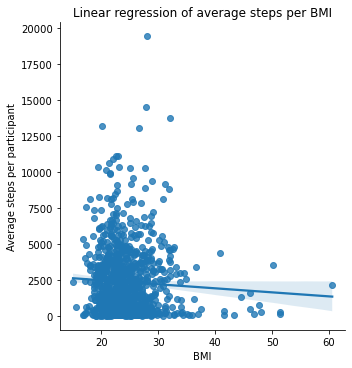

In [127]:
sns.lmplot(x="bmi", y="mean_steps", data=df)
plt.title("Linear regression of average steps per BMI")
plt.xlabel("BMI")
plt.ylabel("Average steps per participant")
plt.show()

In [129]:
x = df[["bmi"]]
y = df["mean_steps"]
lm = LinearRegression() #create a new (empty model)
lm.fit(x, y) #fit the model

df["mean_steps_p"] = lm.predict(x) #generate the predictions and add them to the dataframe
df["resid"] = df["mean_steps"] - df["mean_steps_p"] #get the residuals by subtracting the prediction from the actual views
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_sqm,bmi,mean_steps_p,resid
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5133.875000,3.1684,30.930438,2167.011675,2966.863325
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2826.371951,3.2400,23.765432,2367.974573,458.397379
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439,3.2400,25.617284,2316.034139,1429.868300
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,221.536585,3.1684,25.249337,2326.354249,-2104.817663
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,874.557927,2.7889,21.872423,2421.069382,-1546.511456


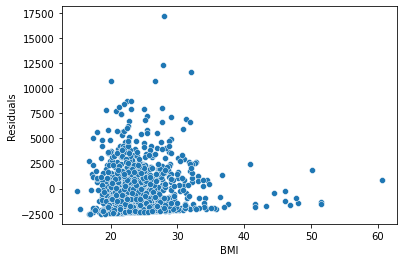

In [132]:
sns.scatterplot(x="bmi",y="resid",data=df)
plt.xlabel("BMI")
plt.ylabel("Residuals")
plt.show()

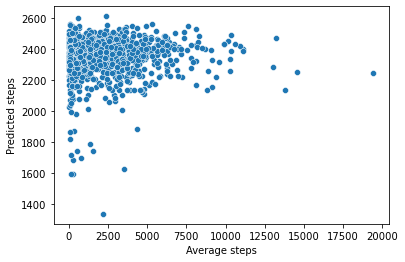

In [133]:
sns.scatterplot(x="mean_steps", y="mean_steps_p", data=df)
plt.xlabel("Average steps")
plt.ylabel("Predicted steps")
plt.show()

Interpretation: The model predicts steps in a smaller frame (around 1200 and 2600 average steps), while the actual average steps roam around 0 to 20000 steps.

In [134]:
df["r2"] = df["resid"] * df["resid"]
print(df["r2"])

0      8.802278e+06
1      2.101282e+05
2      2.044523e+06
3      4.430257e+06
4      2.391698e+06
           ...     
924    4.675867e+05
925    2.618225e+06
926    1.476301e+07
927    2.113595e+06
928    6.261100e+05
Name: r2, Length: 923, dtype: float64


In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(df["mean_steps"], df["mean_steps_p"]))

2409.9190272884516

In [139]:
r2_score = (df["mean_steps"], df["mean_steps_p"])
print(r2_score)

(0      5133.875000
1      2826.371951
2      3745.902439
3       221.536585
4       874.557927
          ...     
924    1742.908537
925     731.689024
926    6268.954268
927    3872.115854
928    3167.902439
Name: mean_steps, Length: 923, dtype: float64, 0      2167.011675
1      2367.974573
2      2316.034139
3      2326.354249
4      2421.069382
          ...     
924    2426.711619
925    2349.781895
926    2426.687719
927    2418.295086
928    2376.631311
Name: mean_steps_p, Length: 923, dtype: float64)


## Evaluation
- Evaluate the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigate the residuals
- Describe and interpret the results

## Conclusion